<a href="https://colab.research.google.com/github/raushan9jnv/Raushan_Play_Store_App_Review_Analysis_Capstone_Project/blob/main/Raushan_Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps df has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dfset contains customer df_reviews of the android apps.</b>

## <b> Explore and analyze the df to discover key factors responsible for app engagement and success. </b>

Sentiment analysis is the classification of a customer’s reviews or comments as positive, negative, and neutral. 

#Importing Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path ="/content/drive/MyDrive/Almabetter/Python/Capstone project/"

In [ ]:
# importing Play store data
df = pd.read_csv(path +"Play Store Data.csv")

In [ ]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [ ]:
#importing User Review data
df_reviews =pd.read_csv(path + "User Reviews.csv")

#Reading Dataset

In [ ]:
df_reviews

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
...,...,...,...,...,...
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


In [ ]:
df_reviews.shape

(64295, 5)

In [ ]:
df_reviews.columns

Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')

In [ ]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [ ]:
df_reviews["App"].nunique()

1074

In [ ]:
df_reviews["App"].unique()

array(['10 Best Foods for You', '104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室',
       '11st', ..., 'Hotwire Hotel & Car Rental App',
       'Housing-Real Estate & Property', 'Houzz Interior Design Ideas'],
      dtype=object)

#Observation
 1. Total Rows = 64295, Total Columns= 5
 2. "Three" Object Datatype Columns
 3. "Two" Float Datatype columns
 
 > Further we drop the "Translated_Review" column and change the datatype of "Sentiment" to int.

 4. There total 1074 unique App.
 5. We have also some null values. Let's Check it.

#Data Cleaning and Pre-Processing

## Checking Null Values

In [ ]:
#Each column null values
df_reviews.isnull().sum()

In [ ]:
#Total count of Null values
df_reviews.isnull().sum().sum()

0

* Approx 1 Million of values are NULL, we drop them immediately

In [ ]:
# Drop missing data
df_reviews.dropna(inplace=True)

In [ ]:
df_reviews.isnull().sum()

App                       0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64

> All null values are removed successfully.

### There no need of "Translated_Review" column in our Analysis, Drop them

In [ ]:
# Drop the column
df_reviews.drop("Translated_Review", axis=1, inplace=True)

In [ ]:
#Column Removed successfully
df_reviews.head()

,App,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,Positive,1.00,0.533333
1,10 Best Foods for You,Positive,0.25,0.288462
3,10 Best Foods for You,Positive,0.40,0.875000
4,10 Best Foods for You,Positive,1.00,0.300000
5,10 Best Foods for You,Positive,1.00,0.300000


##Manipulating Data
* Rename the Rest column for simplicity.
* Assign integer value for 'Sentiment' column

In [ ]:
# Rename the rest
df_reviews.columns = ["App", "Sentiment", "Polarity", "Subjectivity"]

In [ ]:
# Obtain the values of Sentiment without repeating
df_reviews.Sentiment.unique()

array(['Positive', 'Neutral', 'Negative'], dtype=object)

In [ ]:
df_reviews.Sentiment[df_reviews.Sentiment =='Positive'] = 1
df_reviews.Sentiment[df_reviews.Sentiment =='Negative'] = -1
df_reviews.Sentiment[df_reviews.Sentiment =='Neutral'] = 0

In [ ]:
df_reviews.dtypes

App              object
Sentiment        object
Polarity        float64
Subjectivity    float64
dtype: object

In [ ]:
df_reviews['Sentiment'] = df_reviews['Sentiment'].astype('int')

#Visulization of Data

In [ ]:
df_reviews

,App,Sentiment,Polarity,Subjectivity
0,10 Best Foods for You,1,1.000000,0.533333
1,10 Best Foods for You,1,0.250000,0.288462
3,10 Best Foods for You,1,0.400000,0.875000
4,10 Best Foods for You,1,1.000000,0.300000
5,10 Best Foods for You,1,1.000000,0.300000
...,...,...,...,...
64222,Housing-Real Estate & Property,1,0.173333,0.486667
64223,Housing-Real Estate & Property,1,0.225000,0.447222
64226,Housing-Real Estate & Property,-1,-0.287500,0.250000
64227,Housing-Real Estate & Property,1,0.800000,1.000000


In [ ]:
sns.scatterplot('App','Sentiment',data=df_reviews)
plt.show()

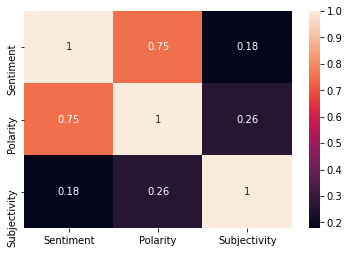

In [ ]:
sns.heatmap(df_reviews.corr(),annot=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


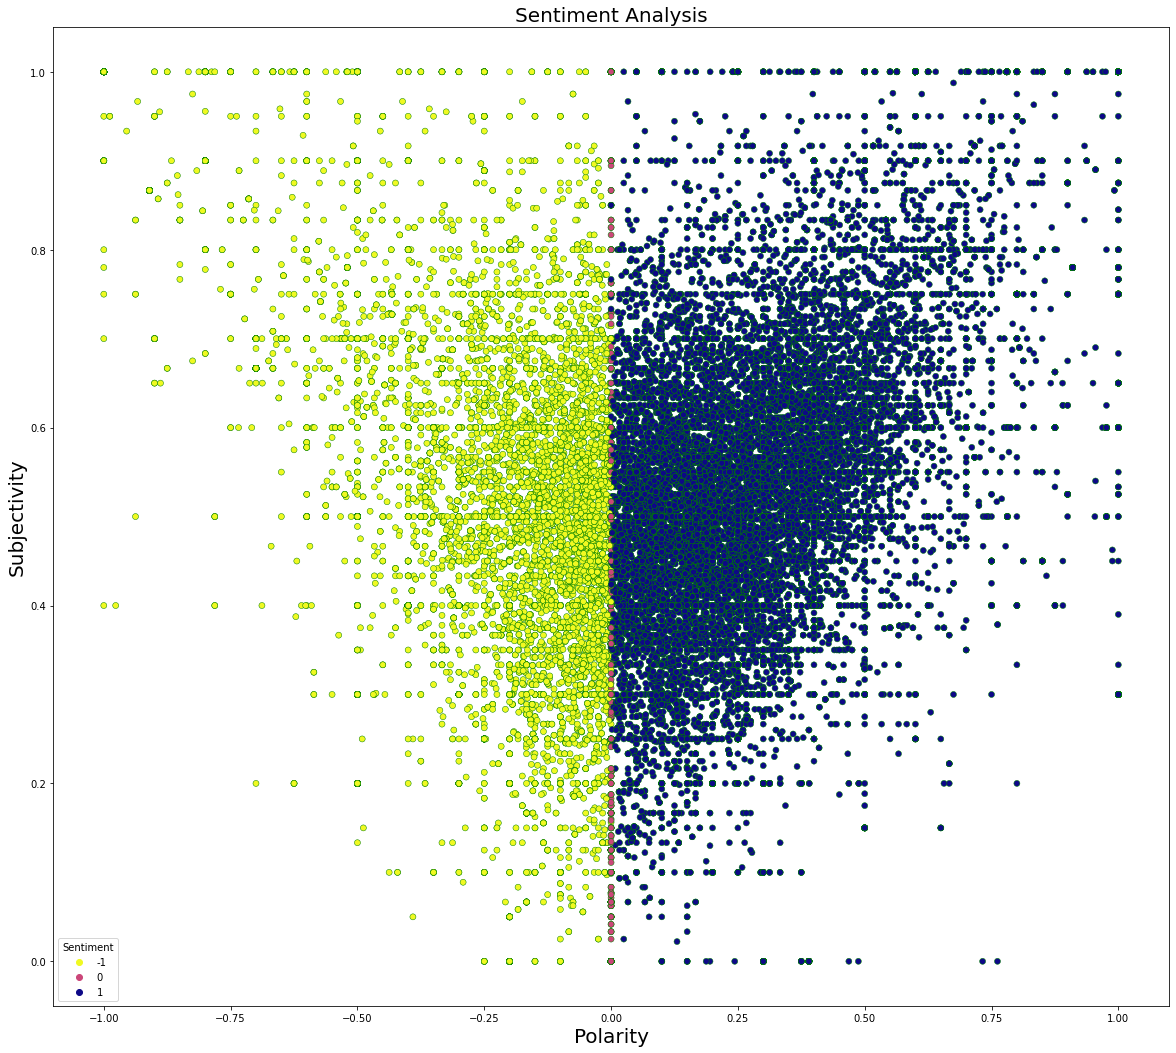

In [ ]:
plt.figure(figsize=(20,18))
j = sns.scatterplot(df_reviews['Polarity'],df_reviews['Subjectivity'],hue=df_reviews['Sentiment'],edgecolor='green',palette='plasma_r')

plt.xlabel('Polarity',fontsize=20)
plt.ylabel('Subjectivity',fontsize=20)
plt.title('Sentiment Analysis', fontsize=20)
plt.show()

# Merging Two Data

In [ ]:
#df.loc[df['App']=='Coloring book moana']
#df_reviews.loc[df_reviews['App']=='Coloring book moana']

In [ ]:
# Here, we obtain the mean for each app by grouping the df

df_reviews_mean = df_reviews.groupby("App").mean().copy()
df_reviews_mean.info()

In [ ]:
#df_reviews_mean

In [ ]:
complete_df = pd.merge(left=df, right=df_reviews_mean, on="App").copy()

complete_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1229 entries, 0 to 1228
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             1229 non-null   object 
 1   Category        1229 non-null   object 
 2   Rating          1228 non-null   float64
 3   Reviews         1229 non-null   object 
 4   Size            1229 non-null   object 
 5   Installs        1229 non-null   object 
 6   Type            1229 non-null   object 
 7   Price           1229 non-null   object 
 8   Content Rating  1229 non-null   object 
 9   Genres          1229 non-null   object 
 10  Last Updated    1229 non-null   object 
 11  Current Ver     1229 non-null   object 
 12  Android Ver     1229 non-null   object 
 13  Sentiment       1229 non-null   float64
 14  Polarity        1229 non-null   float64
 15  Subjectivity    1229 non-null   float64
dtypes: float64(4), object(12)
memory usage: 163.2+ KB


In [ ]:
complete_df.shape

(1229, 16)

In [ ]:
# Drop duplicates
complete_df.drop_duplicates("App", inplace=True)

# Reset the index since now we have a different number of observations
complete_df = complete_df.reset_index().drop("index", axis=1).copy()

complete_df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Sentiment,Polarity,Subjectivity
0,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,0.272727,0.152652,0.641540
1,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up,0.600000,0.268483,0.523447
2,FlipaClip - Cartoon animation,ART_AND_DESIGN,4.3,194216,39M,"5,000,000+",Free,0,Everyone,Art & Design,"August 3, 2018",2.2.5,4.0.3 and up,1.000000,0.412649,0.679226
3,Boys Photo Editor - Six Pack & Men's Suit,ART_AND_DESIGN,4.1,654,12M,"100,000+",Free,0,Everyone,Art & Design,"March 20, 2018",1.1,4.0.3 and up,0.473684,0.283509,0.479298
4,Colorfit - Drawing & Coloring,ART_AND_DESIGN,4.7,20260,25M,"500,000+",Free,0,Everyone,Art & Design;Creativity,"October 11, 2017",1.0.8,4.0.3 and up,0.552632,0.171836,0.572762
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811,"AD - Nieuws, Sport, Regio & Entertainment",NEWS_AND_MAGAZINES,3.7,10369,Varies with device,"1,000,000+",Free,0,Everyone,News & Magazines,"July 28, 2018",Varies with device,Varies with device,0.526316,0.161824,0.465806
812,AppLock,TOOLS,4.4,4931562,Varies with device,"100,000,000+",Free,0,Everyone,Tools,"June 11, 2018",Varies with device,Varies with device,-0.076923,0.016233,0.499941
813,Diary with lock password,LIFESTYLE,4.3,179139,9.7M,"5,000,000+",Free,0,Everyone,Lifestyle,"November 1, 2017",3.5.3,4.0.3 and up,0.596154,0.292267,0.509656
814,Avakin Life - 3D virtual world,FAMILY,4.4,1275373,91M,"10,000,000+",Free,0,Teen,Role Playing,"July 3, 2018",1.021.10,4.1 and up,0.521739,0.080859,0.505326


In [ ]:
# Select columns that will be used
columns = [0, 1, 2, 3, 5, 6, 8, 9, 13, 14, 15]
complete_df = complete_df.iloc[:,columns].copy()

# Remove the + and the , at the end of each observation of Installs then convert to int
complete_df.Installs = [int(obs.replace("+", "").replace(",", "")) for obs in complete_df.Installs]
complete_df.head()

,App,Category,Rating,Reviews,Installs,Type,Content Rating,Genres,Sentiment,Polarity,Subjectivity
0,Coloring book moana,ART_AND_DESIGN,3.9,967,500000,Free,Everyone,Art & Design;Pretend Play,0.272727,0.152652,0.641540
1,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,1000000,Free,Everyone,Art & Design,0.600000,0.268483,0.523447
2,FlipaClip - Cartoon animation,ART_AND_DESIGN,4.3,194216,5000000,Free,Everyone,Art & Design,1.000000,0.412649,0.679226
3,Boys Photo Editor - Six Pack & Men's Suit,ART_AND_DESIGN,4.1,654,100000,Free,Everyone,Art & Design,0.473684,0.283509,0.479298
4,Colorfit - Drawing & Coloring,ART_AND_DESIGN,4.7,20260,500000,Free,Everyone,Art & Design;Creativity,0.552632,0.171836,0.572762


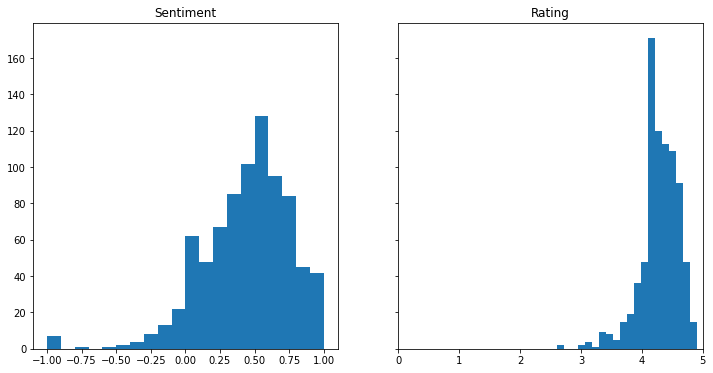

In [ ]:

# Create the plot for the histograms
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6), sharey=True)

# Create the histograms
ax[0].hist(complete_df.Sentiment, bins=20)
ax[1].hist(complete_df.Rating, bins=20)
ax[1].set_xlim(0, 5)

# Add titles
ax[0].set_title("Sentiment")
ax[1].set_title("Rating")

plt.show()

In [ ]:
sentiment_median = np.median(complete_df.Sentiment)
rating_median = np.median(complete_df.Rating)

print("\tSentiment median: {}\n\tRating median: {}".format(sentiment_median, rating_median))

	Sentiment median: 0.47987117552334946
	Rating median: 4.3


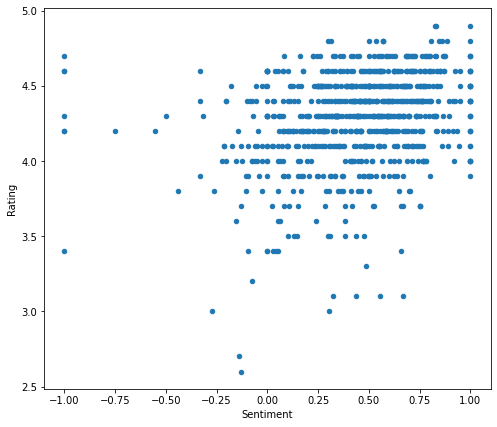

In [ ]:
complete_df.plot("Sentiment", "Rating", kind="scatter", figsize=(8, 7))

plt.show()

In [ ]:
# Separate by Type
free = complete_df.loc[complete_df.Type == "Free"].copy()
paid = complete_df.loc[complete_df.Type == "Paid"].copy()

paid

,App,Category,Rating,Reviews,Installs,Type,Content Rating,Genres,Sentiment,Polarity,Subjectivity
369,Farming Simulator 18,GAME,4.5,18125,100000,Paid,Everyone,Simulation;Education,0.282051,0.064467,0.493330
370,Call of Duty:Black Ops Zombies,GAME,4.2,13004,100000,Paid,Teen,Action,-1.000000,-0.162120,0.442716
438,Dr. Panda & Toto's Treehouse,FAMILY,4.4,3396,50000,Paid,Everyone,Casual;Pretend Play,0.611111,0.180237,0.532672
445,Essential Anatomy 3,MEDICAL,4.1,1533,50000,Paid,Mature 17+,Medical,0.750000,0.225516,0.522328
446,Diabetes & Diet Tracker,MEDICAL,4.6,395,1000,Paid,Everyone,Medical,0.837838,0.363627,0.568469
565,Golfshot Plus: Golf GPS,SPORTS,4.1,3387,50000,Paid,Everyone,Sports,0.675000,0.386179,0.475312
680,Beautiful Widgets Pro,PERSONALIZATION,4.2,97890,1000000,Paid,Everyone,Personalization,0.675676,0.179418,0.501691
682,HD Widgets,PERSONALIZATION,4.3,58617,1000000,Paid,Everyone,Personalization,0.483871,0.181818,0.513802
694,BIG Launcher,PERSONALIZATION,4.3,881,10000,Paid,Everyone,Personalization,0.525000,0.184987,0.410125


In [ ]:
# Obtain the means
free_mean = free.Rating.mean()
paid_mean = paid.Rating.mean()

print("\tFree content mean: {}\n\tPaid content mean: {}".format(free_mean, paid_mean))

	Free content mean: 4.282403965303592
	Paid content mean: 4.3


In [ ]:

sentiment_by_installs = complete_df.groupby("Category").agg({"Installs": "sum", "Sentiment": "mean"})
sentiment_by_installs = sentiment_by_installs.sort_values(by="Installs").reset_index().copy()

sentiment_by_installs.head()

,Category,Installs,Sentiment
0,COMICS,1010000,0.757143
1,EVENTS,1310000,0.708385
2,PARENTING,5200000,0.666058
3,MAPS_AND_NAVIGATION,11000000,0.595374
4,BEAUTY,12200000,0.408459
